Compute unstructured hierarchical clustering...
Number of points: 1500


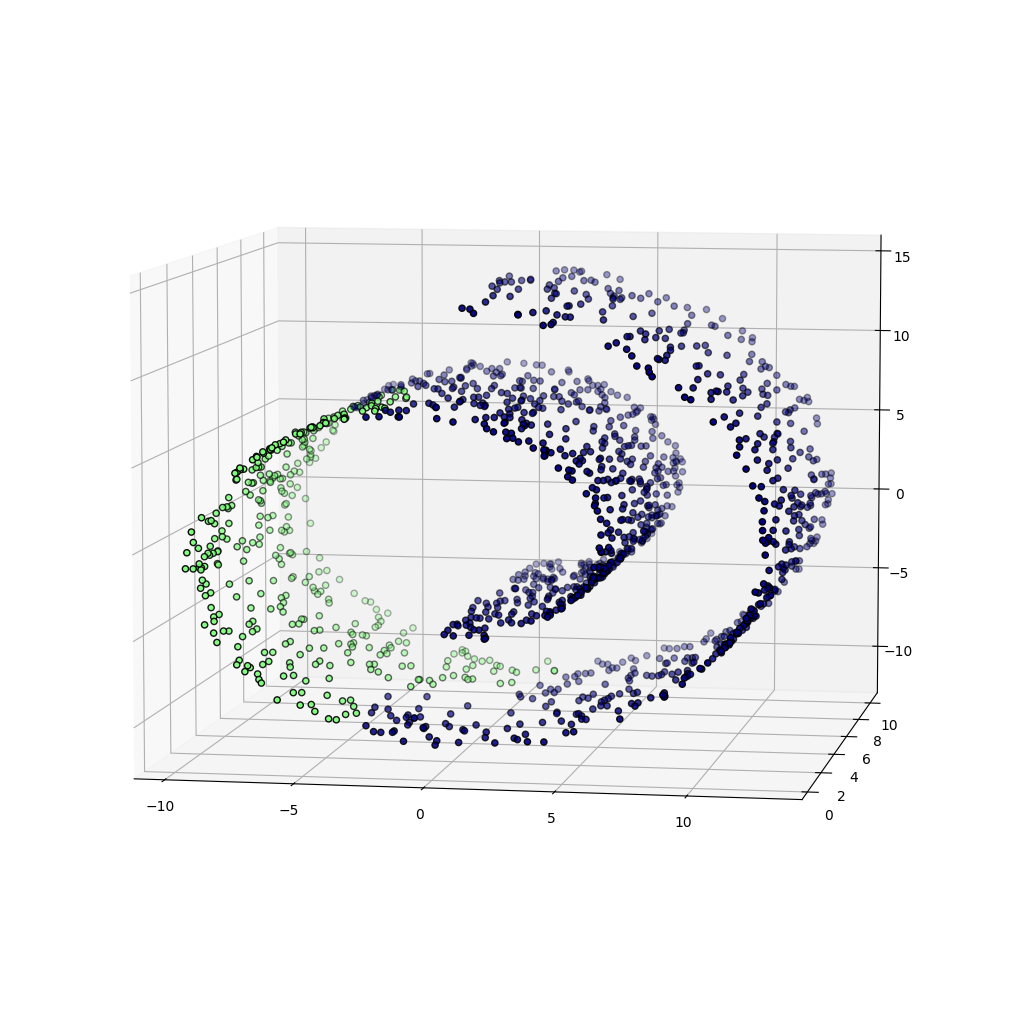

In [3]:
# 参考
# https://scikit-learn.org/stable/auto_examples/cluster/plot_ward_structured_vs_unstructured.html#sphx-glr-auto-examples-cluster-plot-ward-structured-vs-unstructured-py
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

# #############################################################################
# Generate data (swiss roll dataset)
X, _ = make_swiss_roll(n_samples=1500, noise=0.05, random_state=10)
# Make it thinner
X[:, 1] *= .5

# #############################################################################
# Compute clustering
print("Compute unstructured hierarchical clustering...")
ward = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
label = ward.labels_
print("Number of points: %i" % label.size)

# #############################################################################
# Plot result
fig = plt.figure(figsize = (10,10))
ax = p3.Axes3D(fig)
fig.add_axes(ax)
ax.view_init(7, -80)
for l in np.unique(label):
    ax.scatter(X[label == l, 0], X[label == l, 1], X[label == l, 2],
               color=plt.cm.jet(float(l) / np.max(label + 1)),
               s=20, edgecolor='k')

In [4]:
# 標準化
from sklearn import preprocessing
std=preprocessing.StandardScaler()
std.fit(X)
X_std=std.transform(X)

# 次元圧縮に使うライブラリのインポート
from sklearn import decomposition, manifold

#いろいろなアルゴリズムを試す

# 主成分分析（ＰＣＡ）
#pca = decomposition.PCA(n_components=2)
#X_pca = pca.fit_transform(X_std)

# 主成分分析（ＰＣＡ　カーネル版）
#kpca = decomposition.KernelPCA(n_components=2,  kernel='rbf', gamma=3)
#X_pca = kpca.fit_transform(X_std)

#　Spectral Embedding
#spca = manifold.SpectralEmbedding(n_components=2,  affinity='nearest_neighbors')
#X_pca = spca.fit_transform(X_std)

# isomap
#isomap = manifold.Isomap(n_neighbors=12, n_components=2)
#X_pca = isomap.fit_transform(X_std)

# t-SNE
#tsne = manifold.TSNE()
#X_pca = tsne.fit_transform(X_std)

# LLE
lle = manifold.LocallyLinearEmbedding(n_neighbors=12, n_components=2)
X_pca = lle.fit_transform(X_std)


# グラフ描画
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1], c=label)
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

TypeError: solve() got an unexpected keyword argument 'sym_pos'